# Predict the Success of Bank Telemarketing

In [42]:
#import library
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn import model_selection, svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
import seaborn as sns

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import xgboost as xgb
%matplotlib inline

In [821]:
df = pd.read_csv("/Users/kyle/Google Drive (NTU)/Python Learning/Bank Marketing Data/bank-additional/bank-additional-full.csv",';') 

In [822]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [932]:
(df2['y'] ==0).sum()/(df2['y'] ==0).count()

0.8873458288821987

In [823]:
a = 1
for i in range(1,800):
    a = i*50
    print(i)
    print(df['month'][a])


1
may
2
may
3
may
4
may
5
may
6
may
7
may
8
may
9
may
10
may
11
may
12
may
13
may
14
may
15
may
16
may
17
may
18
may
19
may
20
may
21
may
22
may
23
may
24
may
25
may
26
may
27
may
28
may
29
may
30
may
31
may
32
may
33
may
34
may
35
may
36
may
37
may
38
may
39
may
40
may
41
may
42
may
43
may
44
may
45
may
46
may
47
may
48
may
49
may
50
may
51
may
52
may
53
may
54
may
55
may
56
may
57
may
58
may
59
may
60
may
61
may
62
may
63
may
64
may
65
may
66
may
67
may
68
may
69
may
70
may
71
may
72
may
73
may
74
may
75
may
76
may
77
may
78
may
79
may
80
may
81
may
82
may
83
may
84
may
85
may
86
may
87
may
88
may
89
may
90
may
91
may
92
may
93
may
94
may
95
may
96
may
97
may
98
may
99
may
100
may
101
may
102
may
103
may
104
may
105
may
106
may
107
may
108
may
109
may
110
may
111
may
112
may
113
may
114
may
115
may
116
may
117
may
118
may
119
may
120
may
121
may
122
may
123
may
124
may
125
may
126
may
127
may
128
may
129
may
130
may
131
may
132
may
133
may
134
may
135
may
136
may
137
may
138
may
139


In [396]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [224]:
range(len(df))

range(0, 41188)

In [981]:
df2 = df.copy()
day_passed = 0
for i in range(1,len(df)):
    if df2.loc[i,'day_of_week']!= df2.loc[i-1,'day_of_week']:
        day_passed = day_passed + 1
        df2.loc[i,'date'] = day_passed
    else:
        df2.loc[i,'date'] = day_passed
    

In [982]:
df2.loc[0,'date']=0
df2['date']=df2['date']+1
pd.DataFrame({'date':df2['date'],'day':df2['day_of_week'],'month': df2['month']})

,date,day,month
0,1.0,mon,may
1,1.0,mon,may
2,1.0,mon,may
3,1.0,mon,may
4,1.0,mon,may
5,1.0,mon,may
6,1.0,mon,may
7,1.0,mon,may
8,1.0,mon,may
9,1.0,mon,may


There in total 486 transaction days in the dataset

In [382]:
a = pd.array(df2.groupby('date').count().age)
ax = range(0,486)
dayplot = pd.DataFrame({'day' : ax, 'count' : a})

In [985]:
df2

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,Y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1.0,0
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1.0,0
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1.0,0
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1.0,0
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1.0,0
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1.0,0


In [385]:
dayplot.loc[dayplot['count'] ==822]

,day,count
103,103,822


The telemarketing amounts for this campaign has decreased after 1 year.
How about the success rate?

In [983]:
df2

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1.0
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1.0
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1.0
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1.0
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1.0
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1.0


In [986]:
df2['Y'] = 0
df2.Y.loc[df2['y']=='yes']=1

In [987]:
z

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,Y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1.0,0
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1.0,0
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1.0,0
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1.0,0
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1.0,0
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1.0,0


In [393]:
b = pd.array(df2.groupby('date').Y.sum())
dayplot['success'] = b
dayplot['success_rate'] = dayplot['success']/dayplot['count'] 

In [465]:
dayplot

,day,count,success,success_rate
0,0,360,7,0.019444
1,1,396,7,0.017677
2,2,390,7,0.017949
3,3,433,10,0.023095
4,4,407,11,0.027027
5,5,261,4,0.015326
6,6,408,15,0.036765
7,7,417,11,0.026379
8,8,450,17,0.037778
9,9,371,19,0.051213


In [419]:
np.convolve(dayplot['success'], np.ones((5,))/5, mode='valid')

array([ 8.4,  7.8,  9.4, 10.2, 11.6, 13.2, 14.4, 13.4, 15. , 14.4, 13.6,
       13.6, 14.6, 13.8, 15.8, 15.8, 16.8, 16.6, 16.4, 14.2, 13.2, 12.8,
       12.4, 11.8, 11. , 12. , 11.8, 14. , 12.4, 10.8,  7.8,  6.2,  2.2,
        1.8,  2.2,  2.2,  1.6,  1.2,  4.6,  8.8, 13.4, 18.2, 21.4, 20.6,
       21.2, 21. , 19.8, 22.6, 25.4, 24. , 24.2, 23.4, 21.6, 20.4, 18.8,
       19.2, 19.2, 15.6, 15.2, 16.8, 15. , 15.8, 19.2, 20.8, 21. , 20.6,
       19.6, 17.2, 14.8, 13.2, 13.2, 13.2, 13. , 12. , 11.2,  9.4,  7.2,
        6.8,  5.6,  4.2,  3.6,  3.8,  3.8,  3.4,  3.8,  3.8,  3. ,  2.4,
        2.6,  2.2,  2.2,  2.6,  2.4,  2. ,  2. ,  2.2,  5.6,  9. , 17.2,
       26.8, 33.6, 29.8, 26. , 17.4,  7.4,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  2.6,  4.6,  5. ,  6.4,  8.2,  6. ,  5.8,  7.4,  7. ,
        6. ,  5.8,  5.4,  4.4,  3.8,  3. ,  3.6,  3.2,  3.2,  3.8,  6.6,
        6.8,  6.4,  6.6,  7. ,  5. ,  5.6,  6.6,  9.4, 11.2, 15.6, 19. ,
       22.8, 27.2, 33.4, 33. , 32.4, 29. , 21.4, 13

In [420]:
mov5day = pd.DataFrame()
mov5day['count'] = np.convolve(dayplot['count'], np.ones((5,))/5, mode='valid')
mov5day['success'] = np.convolve(dayplot['success'], np.ones((5,))/5, mode='valid')
mov5day['success_rate'] = np.convolve(dayplot['success_rate'], np.ones((5,))/5, mode='valid')

In [455]:
rows = np.shape(mov5day)[0] #number of rows
columns = np.shape(mov5day)[1] #number of columns
l = range(rows)[0::5] #indexes of each third element including the first element

new_matrix = pd.DataFrame() #Your new matrix

for i in range(len(l)):
    new_matrix[i] = mov5day.loc[l[i]] #addin

In [457]:
df1_t = new_matrix.T


,count,success,success_rate
0,397.2,8.4,0.021038
1,381.4,13.2,0.033492
2,403.8,13.6,0.033591
3,444.8,15.8,0.036138
4,328.8,13.2,0.041008
5,260.4,12.0,0.048021
6,182.6,7.8,0.067398
7,44.8,2.2,0.043649
8,250.6,13.4,0.040695
9,299.8,21.0,0.071041


In [740]:
df1_t['week'] = df1_t.index+1

### Exploratory Data Analysis

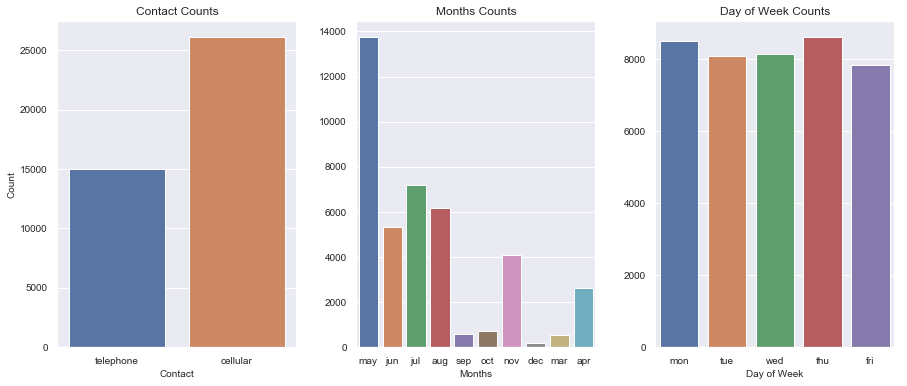

In [739]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (15,6))
sns.countplot(df['contact'], ax = ax1)
ax1.set_xlabel('Contact', fontsize = 10)
ax1.set_ylabel('Count', fontsize = 10)
ax1.set_title('Contact Counts')
ax1.tick_params(labelsize=10)

sns.countplot(df['month'], ax = ax2, order = ['may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec','mar', 'apr'])
ax2.set_xlabel('Months', fontsize = 10)
ax2.set_ylabel('')
ax2.set_title('Months Counts')
ax2.tick_params(labelsize=10)

sns.countplot(df['day_of_week'], ax = ax3)
ax3.set_xlabel('Day of Week', fontsize = 10)
ax3.set_ylabel('')
ax3.set_title('Day of Week Counts')
ax3.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.25)

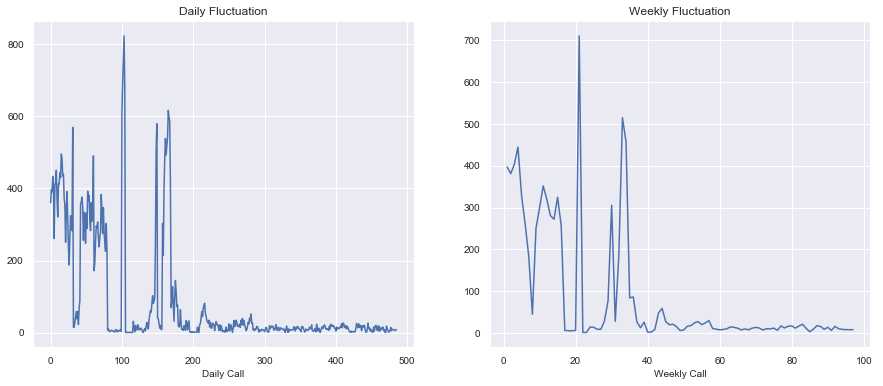

In [772]:
fig, (ax3, ax4) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,6))
sns.lineplot(ax = ax3,x = 'day', y = 'count',data = dayplot)
ax3.set_xlabel('Daily Call', fontsize = 10)
ax3.set_ylabel('')
ax3.set_title('Daily Fluctuation')
ax3.tick_params(labelsize=10)

sns.lineplot(ax = ax4,x = 'week', y = 'count',data = df1_t)
ax4.set_xlabel('Weekly Call', fontsize = 10)
ax4.set_ylabel('')
ax4.set_title('Weekly Fluctuation')
ax4.tick_params(labelsize=10)

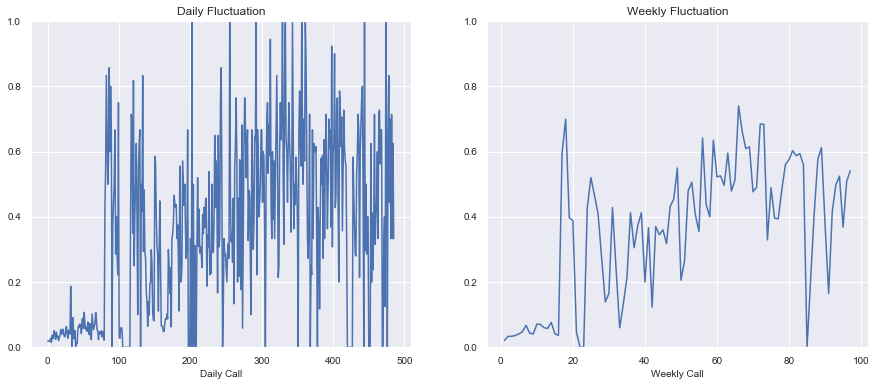

In [777]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,6))
sns.lineplot(ax = ax1,x = 'day', y = 'success_rate',data = dayplot)
ax1.set_xlabel('Daily Call', fontsize = 10)
ax1.set_ylabel('')
ax1.set_ylim(0,1)
ax1.set_title('Daily Fluctuation')
ax1.tick_params(labelsize=10)

sns.lineplot(ax = ax2,x = 'week', y = 'success_rate',data = df1_t)
ax2.set_xlabel('Weekly Call', fontsize = 10)
ax2.set_ylabel('')
ax2.set_ylim(0,1)
ax2.set_title('Weekly Fluctuation')
ax2.tick_params(labelsize=10)



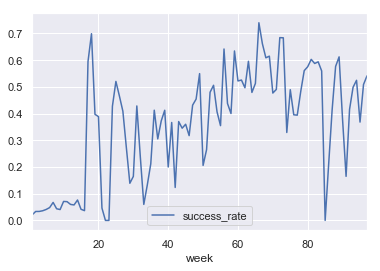

In [743]:
df1_t.plot( x = 'week',y = 'success_rate')

After We apply 5 day moving average, the fluctuation still exist. This imply lower frequency temporal factor such as 'month' influenced the success rate. Perhaps clients had more willingness to save money during certain months?

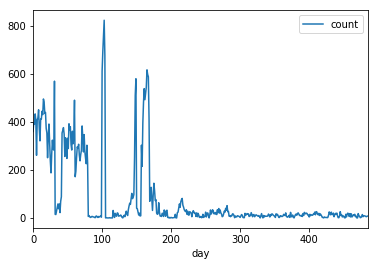

In [386]:
dayplot.plot(x = 'day', y = 'count')

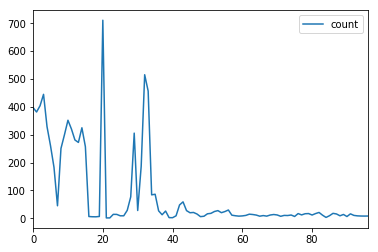

In [466]:
df1_t.plot(y = 'count')

Total call per days decrease as time went by, many the campaign was not the priority as new campaign launched.

In [48]:
df.describe(include=['O'])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [26]:
df.shape


(4119, 21)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [53]:
pd.crosstab(index = df["y"],
                              columns="count")

col_0,count
y,
no,36548
yes,4640


Relatively imbalanced dataset with only 10% y

In [54]:
df.describe()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


1. Previous shows:75% clients clients have not been contacted by bank before: First contact with bank
2. Most contact are finished with 5 mins
3. pdays stands for "Recency"(last contact), and from 1. we can know most of them would be N/A (denoted as 999)

In [729]:
pd.crosstab(df['contact'],columns='count')

col_0,count
contact,
cellular,26144
telephone,15044


In [737]:
contact_s = df2.groupby('contact').Y.sum()
contact_c = df2.groupby('contact').Y.count()
contact_d = pd.DataFrame({'count' : contact_c, 'success' : contact_s})
contact_d['success_rate'] = contact_d['success']/contact_d['count']

In [738]:
contact_d

,count,success,success_rate
contact,,,
cellular,26144,3853,0.147376
telephone,15044,787,0.052313


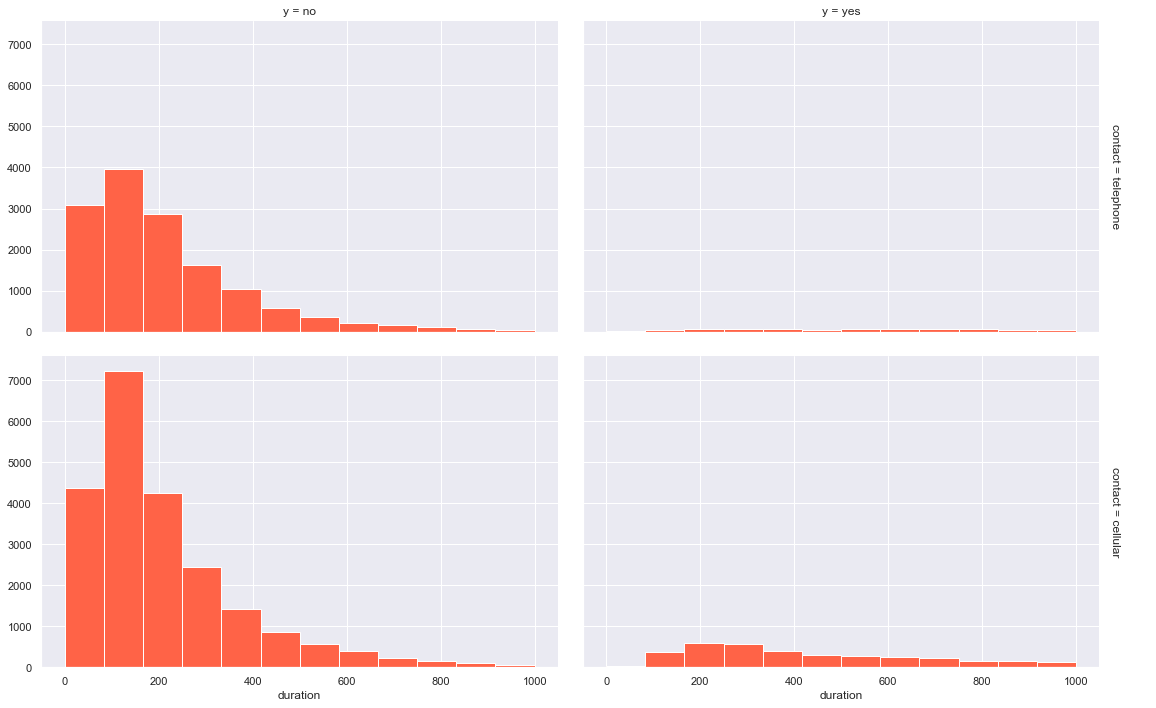

In [736]:
sns.set(style="darkgrid")
grid = sns.FacetGrid(df, col='y',height = 5, row='contact', aspect=1.6,margin_titles=True)
grid.map(plt.hist, 'duration',color="tomato",  bins=np.linspace(0, 1000, 13))
grid.add_legend();

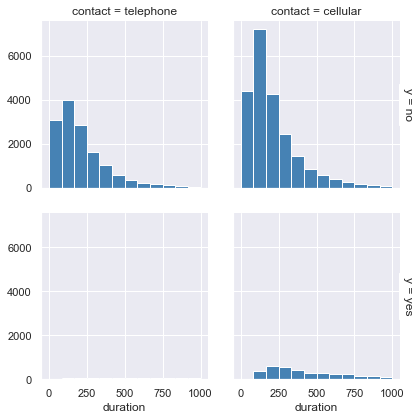

In [500]:
sns.set(style="darkgrid")

g = sns.FacetGrid(df, row="y", col="contact", margin_titles=True)
bins = np.linspace(0, 1000, 13)
g.map(plt.hist, "duration", color="steelblue", bins=bins)

While talking on cell phone lead to higher probability of success rate

In [480]:
job_s = df2.groupby('job').Y.sum()
job_c = df2.groupby('job').Y.count()
job_d = pd.DataFrame({'count' : job_c, 'success' : job_s})
job_d['success_rate'] = job_d['success']/job_d['count']

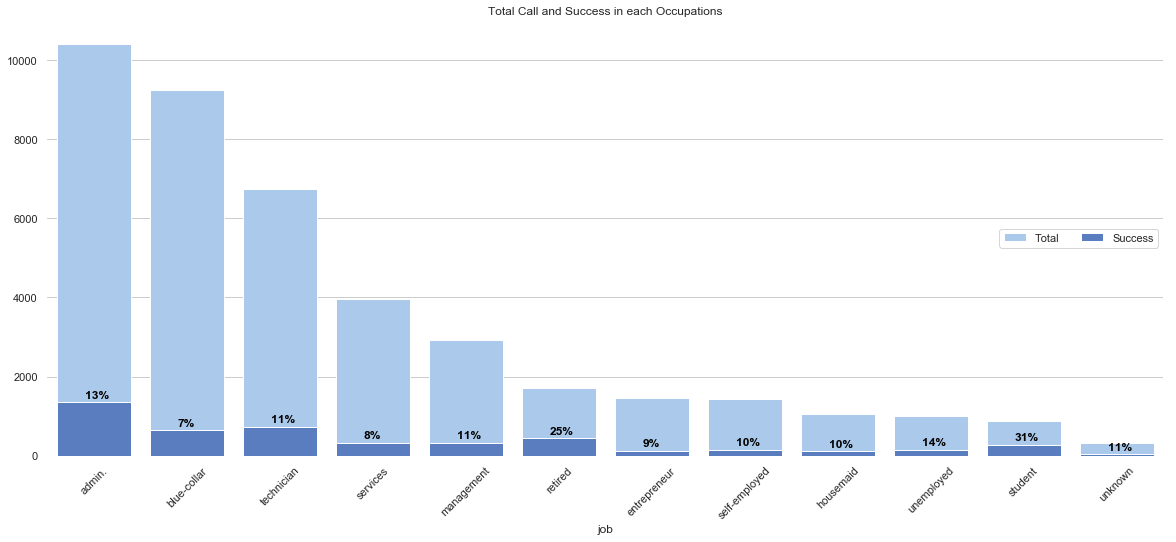

In [673]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 8))
# Load the example car crash dataset
# Plot the total crashes
sns.set_color_codes("pastel")
g = sns.barplot(y="count", x=job_d.index, data=job_d,
            label="Total", color="b",order = job_d.sort_values('count',ascending=False).index)

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
g = sns.barplot(y="success", x=job_d.index, data=job_d,
            label="Success", color="b",order = job_d.sort_values('count',ascending=False).index)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
for i, v in enumerate(job_d.sort_values('count',ascending=False)['success_rate']):
    g.text( i-0.1, job_d.sort_values('count',ascending=False)['success'][i]+100, '{0:.0%}'.format(round(v,2)), color='black', fontweight='bold')


# Add a legend and informative axis label
ax.legend(ncol=2, loc="center right", frameon=True)
ax.set(ylim=(0, 11000), ylabel="",
    title="Total Call and Success in each Occupations")
sns.despine(left=True, bottom=True)

Seems that students and retired workers are more likely to subscribe than other occupation

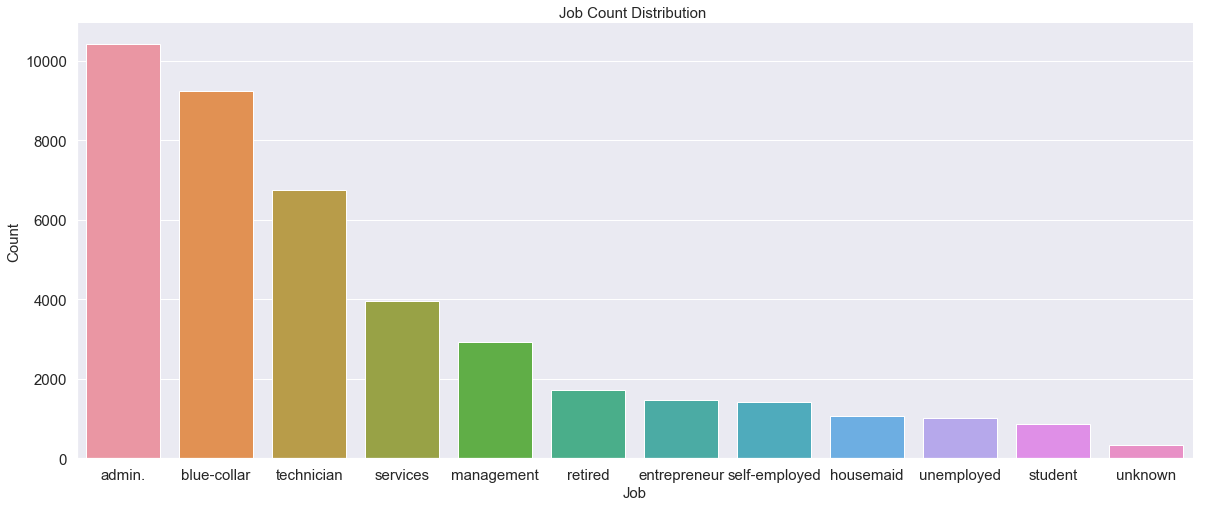

In [501]:
# What kind of jobs clients this bank have, if you cross jobs with default, loan or housing, there is no relation
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'job', data = df,order = df['job'].value_counts().index)
ax.set_xlabel('Job', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Job Count Distribution ', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

In [679]:
month_s = df2.groupby('month').Y.sum()
month_c = df2.groupby('month').Y.count()
month_d = pd.DataFrame({'count' : month_c, 'success' : month_s})
month_d['success_rate'] = month_d['success']/month_d['count']

In [709]:
label_m = ["may","jun","jul","aug","sep","oct","nov","dec","mar","apr"]
month_d = month_d.reindex(label_m)

In [711]:
month_d

,count,success,success_rate
month,,,
may,13769,886,0.064347
jun,5318,559,0.105115
jul,7174,649,0.090466
aug,6178,655,0.106021
sep,570,256,0.449123
oct,718,315,0.438719
nov,4101,416,0.101439
dec,182,89,0.489011
mar,546,276,0.505495


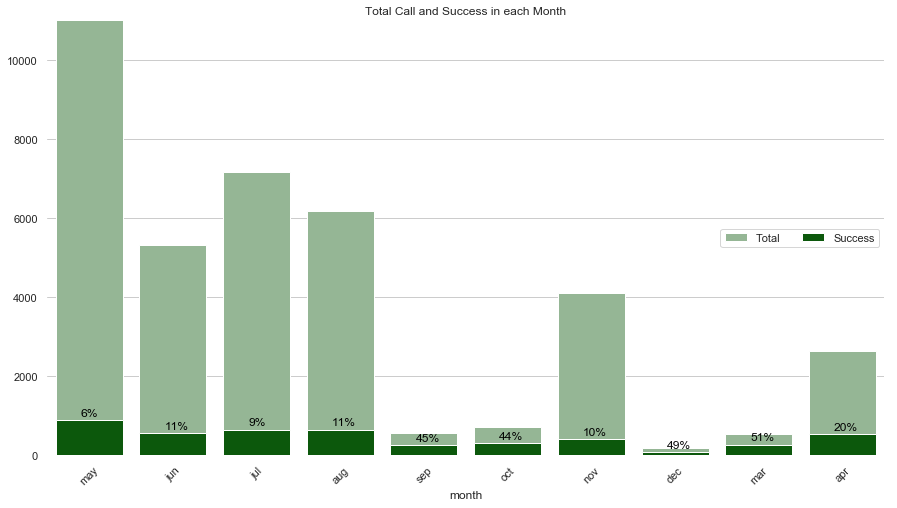

In [712]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 8))
# Load the example car crash dataset
# Plot the total crashes
sns.set_color_codes("pastel")
g = sns.barplot(y="count", x=month_d.index, data=month_d,
            label="Total", color="darkseagreen",order=label_m)

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
g = sns.barplot(y="success", x=month_d.index, data=month_d,
            label="Success", color="darkgreen",order=label_m)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
for i, v in enumerate(month_d['success_rate']):
    g.text( i-0.1, month_d.loc[label_m[i]]['success']+100, '{0:.0%}'.format(round(v,2)), color='black')


# Add a legend and informative axis label
ax.legend(ncol=2, loc="center right", frameon=True)
ax.set(ylim=(0, 11000), ylabel="",
    title="Total Call and Success in each Month")
sns.despine(left=True, bottom=True)

In [674]:
week_s = df2.groupby('day_of_week').Y.sum()
week_c = df2.groupby('day_of_week').Y.count()
week_d = pd.DataFrame({'count' : week_c, 'success' : week_s})
week_d['success_rate'] = week_d['success']/week_d['count']

In [713]:
label_w = ['mon','tue','wed','thu','fri']
week_d = week_d.reindex(label_w)

In [714]:
week_d

,count,success,success_rate
day_of_week,,,
mon,8514,847,0.099483
tue,8090,953,0.117800
wed,8134,949,0.116671
thu,8623,1045,0.121188
fri,7827,846,0.108087


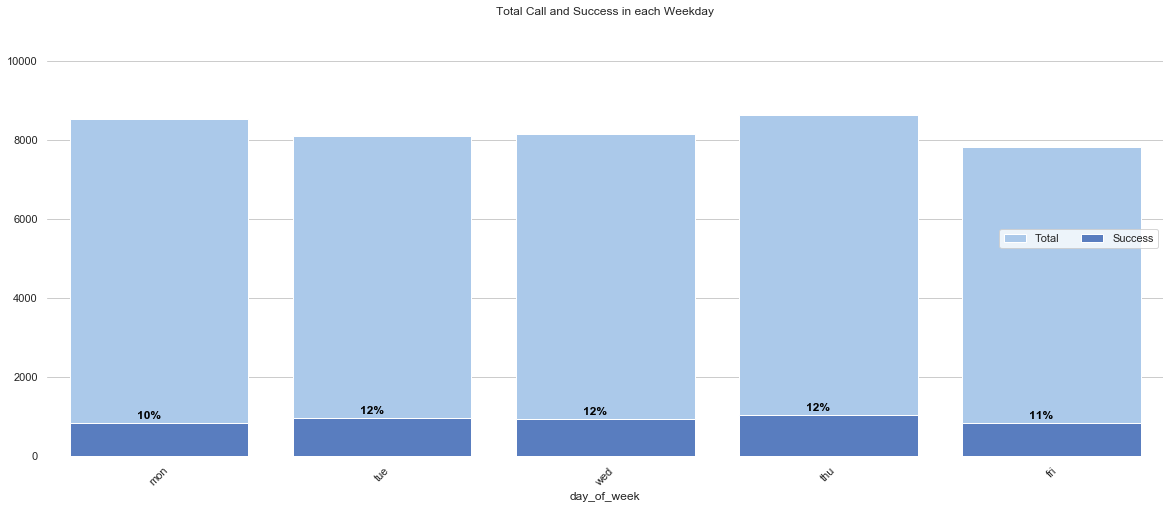

In [715]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 8))
# Load the example car crash dataset
# Plot the total crashes
sns.set_color_codes("pastel")
g = sns.barplot(y="count", x=week_d.index, data=week_d,
            label="Total", color="b",order = label_w)

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
g = sns.barplot(y="success", x=week_d.index, data=week_d,
            label="Success", color="b",order=label_w)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
for i, v in enumerate(week_d['success_rate']):
    g.text( i-0.1, week_d.loc[label_w[i]]['success']+100, '{0:.0%}'.format(round(v,2)), color='black', fontweight='bold')


# Add a legend and informative axis label
ax.legend(ncol=2, loc="center right", frameon=True)
ax.set(ylim=(0, 11000), ylabel="",
    title="Total Call and Success in each Weekday")
sns.despine(left=True, bottom=True)

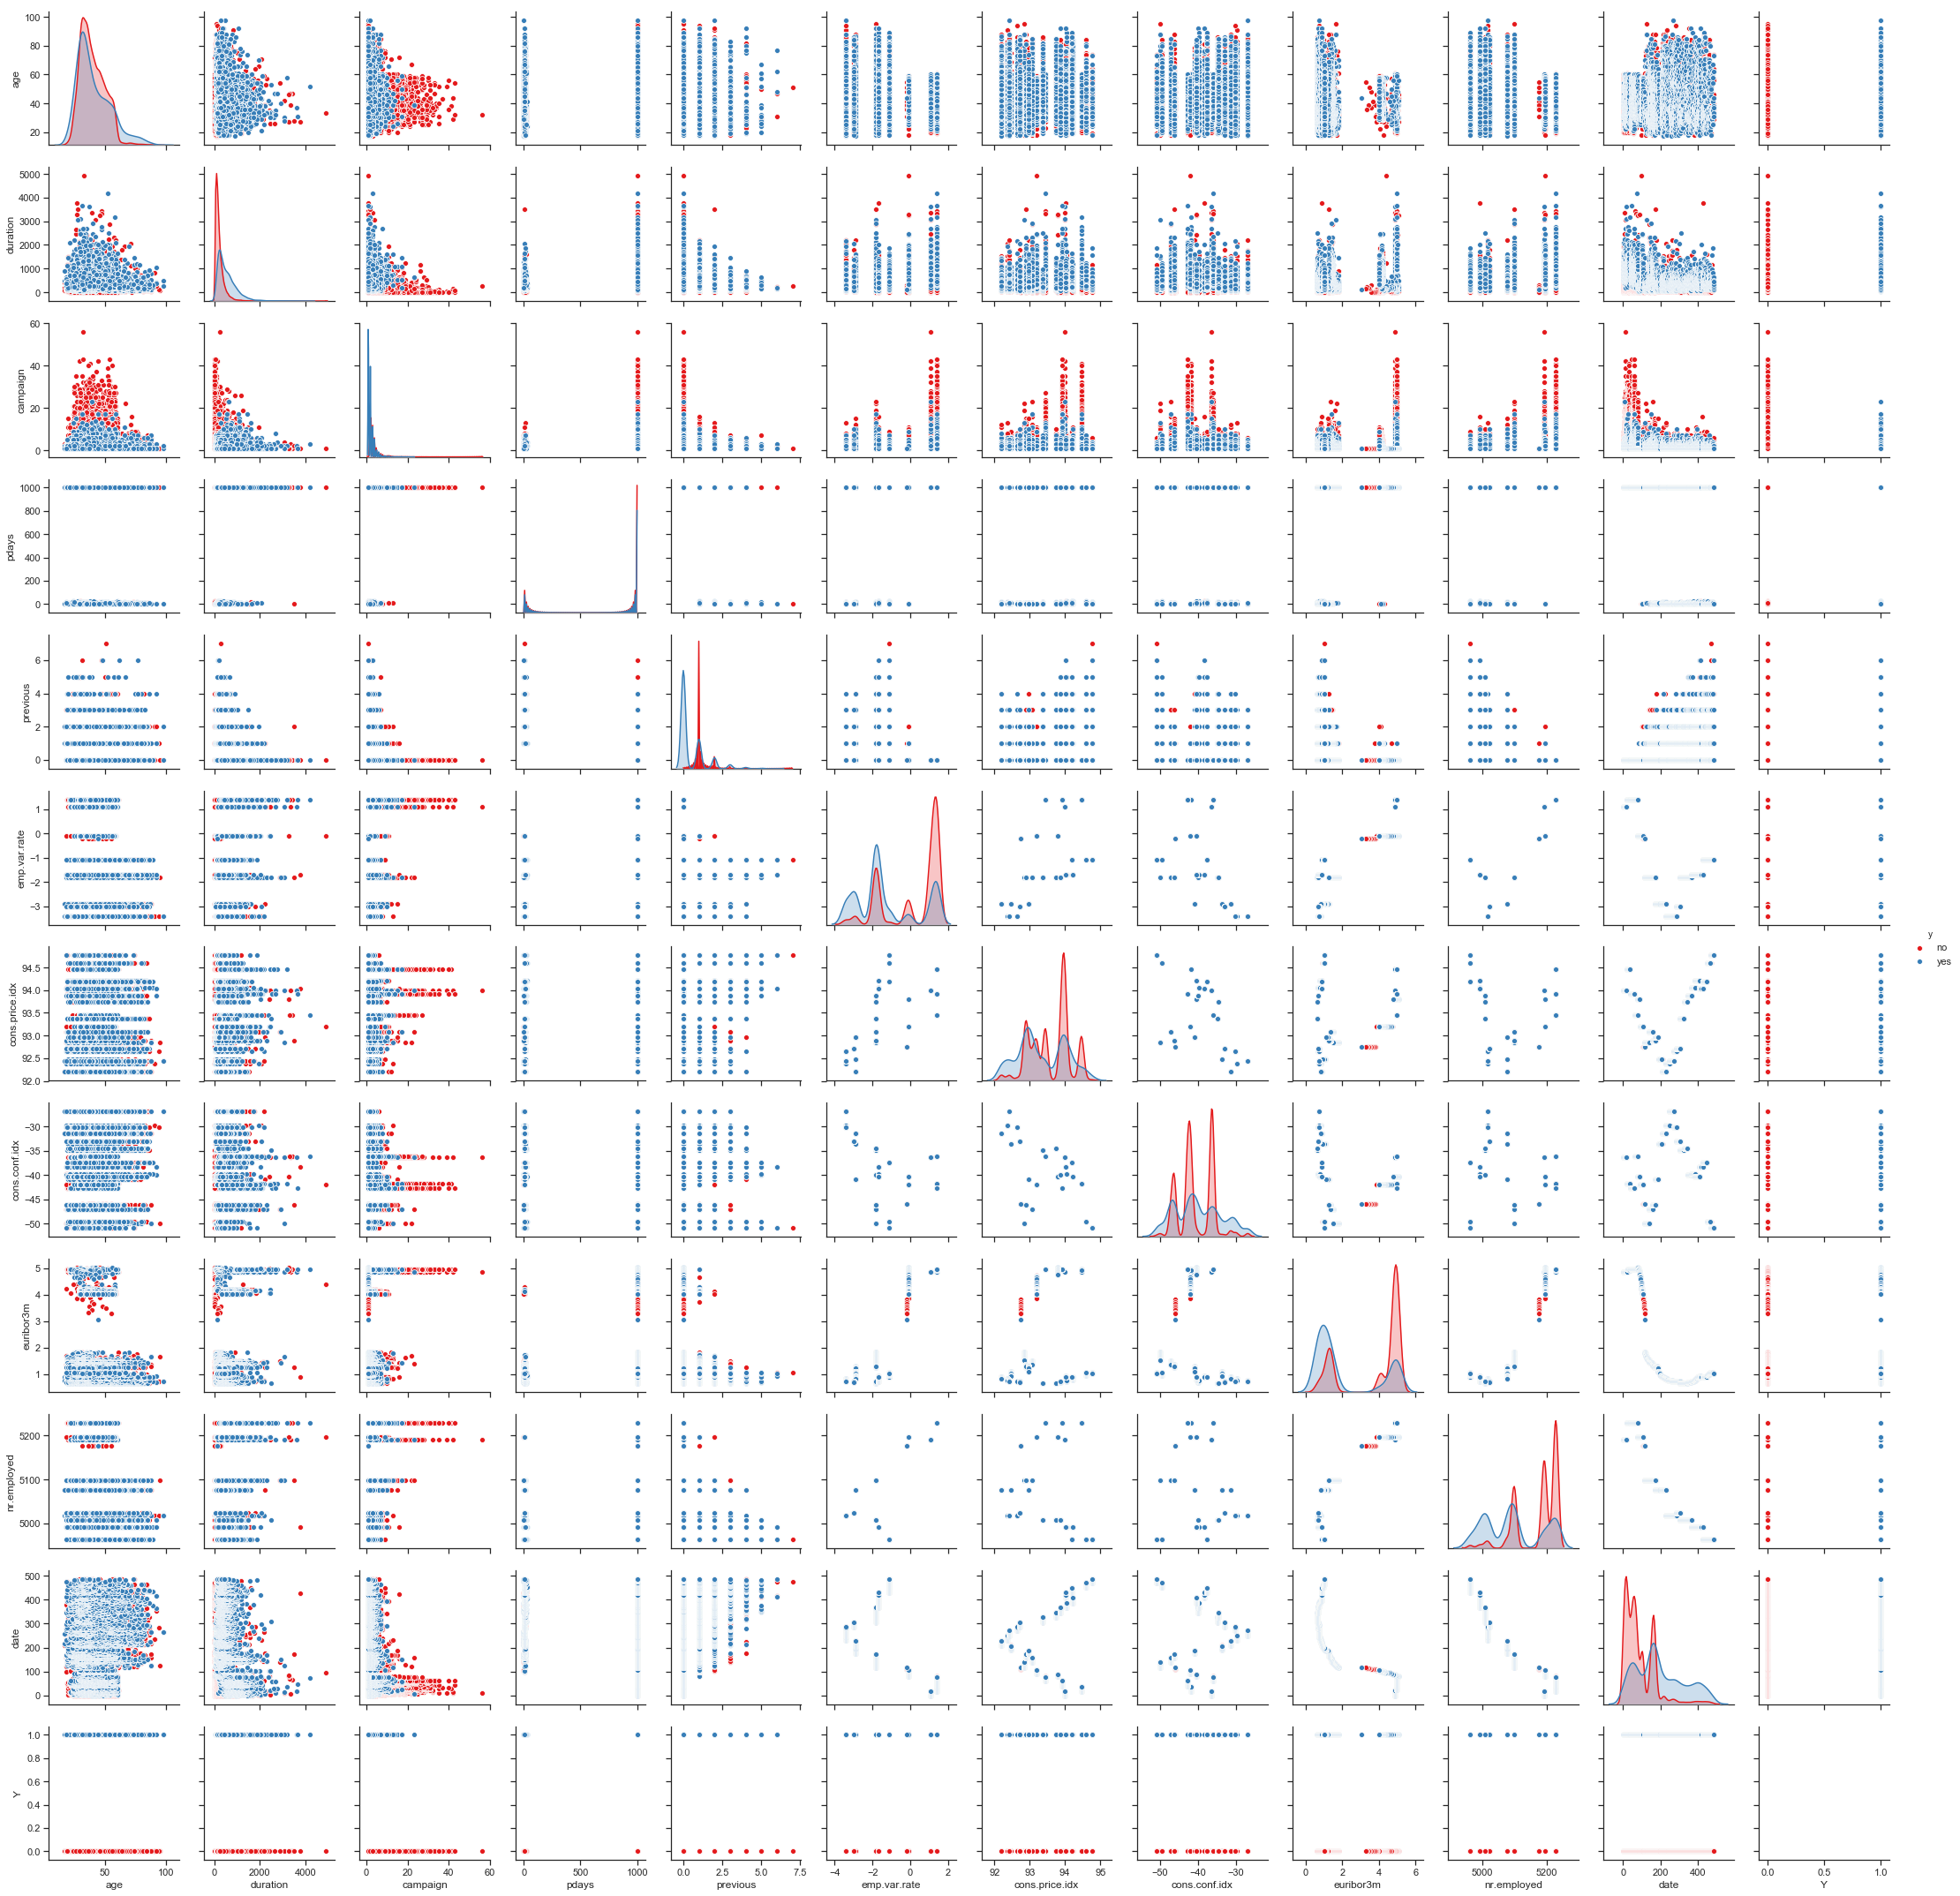

In [779]:
sns.set(style="ticks")

sns.pairplot(df2, hue="y", palette="Set1")
plt.show()

In [784]:
ho_s = df2.groupby('housing').Y.sum()
ho_c = df2.groupby('housing').Y.count()
ho_d = pd.DataFrame({'count' : ho_c, 'success' : ho_s})
ho_d['success_rate'] = ho_d['success']/ho_d['count']
ho_d

,count,success,success_rate
housing,,,
no,18622,2026,0.108796
unknown,990,107,0.108081
yes,21576,2507,0.116194


In [786]:
def_s = df2.groupby('default').Y.sum()
def_c = df2.groupby('default').Y.count()
def_d = pd.DataFrame({'count' : def_c, 'success' : def_s})
def_d['success_rate'] = def_d['success']/def_d['count']
def_d

,count,success,success_rate
default,,,
no,32588,4197,0.12879
unknown,8597,443,0.05153
yes,3,0,0.00000


In [785]:
lo_s = df2.groupby('loan').Y.sum()
lo_c = df2.groupby('loan').Y.count()
lo_d = pd.DataFrame({'count' : lo_c, 'success' : lo_s})
lo_d['success_rate'] = lo_d['success']/lo_d['count']
lo_d

,count,success,success_rate
loan,,,
no,33950,3850,0.113402
unknown,990,107,0.108081
yes,6248,683,0.109315


In [781]:
df["housing"].value_counts()/len(df)


yes        0.523842
no         0.452122
unknown    0.024036
Name: housing, dtype: float64

In [782]:
df["loan"].value_counts()/len(df)



no         0.824269
yes        0.151695
unknown    0.024036
Name: loan, dtype: float64

In [ ]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(df2, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Y', 'Sex', palette='deep')
grid.add_legend()

In [988]:
df.head()z

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Model Preparation

In [997]:
df3 = df2.copy()

In [998]:
df3.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,Y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1.0,0


In [999]:
df3 = pd.get_dummies(data = df3, columns = ['job'] , prefix = ['job'] , drop_first = True)
df3 = pd.get_dummies(data = df3, columns = ['marital'] , prefix = ['marital'] , drop_first = True)
df3 = pd.get_dummies(data = df3, columns = ['education'], prefix = ['education'], drop_first = True)
df3 = pd.get_dummies(data = df3, columns = ['default'] , prefix = ['default'] , drop_first = True)
df3 = pd.get_dummies(data = df3, columns = ['housing'] , prefix = ['housing'] , drop_first = True)
df3 = pd.get_dummies(data = df3, columns = ['loan'] , prefix = ['loan'] , drop_first = True)
df3 = pd.get_dummies(data = df3, columns = ['contact'] , prefix = ['contact'] , drop_first = True)
df3 = pd.get_dummies(data = df3, columns = ['month'] , prefix = ['month'] , drop_first = True)
df3 = pd.get_dummies(data = df3, columns = ['day_of_week'] , prefix = ['day_of_week'] , drop_first = True)
df3 = pd.get_dummies(data = df3, columns = ['poutcome'] , prefix = ['poutcome'] , drop_first = True)

In [1001]:
df.iloc[0]

age                        56
job                 housemaid
marital               married
education            basic.4y
default                    no
housing                    no
loan                       no
contact             telephone
month                     may
day_of_week               mon
duration                  261
campaign                    1
pdays                     999
previous                    0
poutcome          nonexistent
emp.var.rate              1.1
cons.price.idx         93.994
cons.conf.idx           -36.4
euribor3m               4.857
nr.employed              5191
y                          no
Name: 0, dtype: object

In [1014]:
df3.Y.sum()

4640

In [923]:
df3.iloc[30429]['date']

158.0

In [924]:
30429/10759

2.8282368249837346

In [972]:
df3.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_6,month_7,month_8,month_9,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,poutcome_1,poutcome_2
0,39,261,0,26,0,8,18,16,287,8,...,1,0,0,0,1,0,0,0,1,0
1,40,149,0,26,0,8,18,16,287,8,...,1,0,0,0,1,0,0,0,1,0
2,20,226,0,26,0,8,18,16,287,8,...,1,0,0,0,1,0,0,0,1,0
3,23,151,0,26,0,8,18,16,287,8,...,1,0,0,0,1,0,0,0,1,0
4,39,307,0,26,0,8,18,16,287,8,...,1,0,0,0,1,0,0,0,1,0


30429 make it a whole year for training from May-2008 to April-2009

In [1003]:
df_train = df3.iloc[0:30429]

In [1004]:
df_test = df3.iloc[30429:]

In [860]:
df_test.y

30429    0
30430    0
30431    0
30432    0
30433    0
30434    1
30435    0
30436    1
30437    1
30438    0
30439    1
30440    0
30441    1
30442    0
30443    0
30444    0
30445    0
30446    0
30447    0
30448    1
30449    0
30450    1
30451    1
30452    1
30453    0
30454    1
30455    0
30456    0
30457    0
30458    1
        ..
41158    1
41159    1
41160    1
41161    0
41162    0
41163    1
41164    1
41165    1
41166    1
41167    0
41168    0
41169    0
41170    0
41171    1
41172    1
41173    1
41174    1
41175    0
41176    0
41177    0
41178    1
41179    0
41180    0
41181    1
41182    0
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 10759, dtype: int64

In [1015]:
X_Train = df_train.drop(["y","Y"], axis=1)
Y_Train = df_train["Y"]
X_predict  = df_test.copy().drop(["y","Y"], axis=1)
Y_predict = df_test['Y']
X_Train.shape, Y_Train.shape, X_predict.shape, Y_predict.shape

((30429, 54), (30429,), (10759, 54), (10759,))

In [1016]:
X_train, X_test, y_train, y_test = train_test_split(X_Train,Y_Train,test_size = 0.2,random_state = 123)

### Model and Comparison

In [1007]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV


#### Logistics Regression

In [1017]:
# Create the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

# Instantiate the logistic regression classifier: logreg
logreg = LogisticRegression()

# Create train and test sets

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg,param_grid,cv = 5)

# Fit it to the training data
logreg_cv.fit(X_train,y_train)

/Users/kyle/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kyle/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kyle/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kyle/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kyle/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 

/Users/kyle/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kyle/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kyle/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kyle/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/kyle/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.

/Users/kyle/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kyle/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kyle/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kyle/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kyle/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 

/Users/kyle/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kyle/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kyle/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kyle/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kyle/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': array([1.00000e-05, 8.48343e-05, 7.19686e-04, 6.10540e-03, 5.17947e-02,
       4.39397e-01, 3.72759e+00, 3.16228e+01, 2.68270e+02, 2.27585e+03,
       1.93070e+04, 1.63789e+05, 1.38950e+06, 1.17877e+07, 1.00000e+08]), 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [1022]:
# Compute and print metrics
print("Accuracy: {}".format(logreg_cv.score(X_test, y_test)))
acc_log = logreg_cv.score(X_test, y_test)
# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))

Accuracy: 0.94446270128163
Tuned Logistic Regression Parameter: {'C': 3.727593720314938, 'penalty': 'l1'}
Tuned Logistic Regression Accuracy: 0.9438442262662777


In [1020]:
logreg = LogisticRegression(**logreg_cv.best_params_)
logreg.fit(X_Train,Y_Train)
logreg_Y_pred = logreg.predict(X_predict)
logreg_Y_pred

/Users/kyle/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([1, 0, 0, ..., 1, 1, 1])

In [1021]:
from sklearn.feature_selection import f_regression
logreg = LogisticRegression(**logreg_cv.best_params_)

# Fit it to the training data
logreg.fit(X_Train,Y_Train)
y_pred = logreg.predict(X_test)
print(logreg.score(X_test,y_test))
#Coefficient report
coeff_df = pd.DataFrame(X_train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])
coeff_df["P-value"] = pd.Series(f_regression(X_train, y_train)[1])
coeff_df.sort_values(by='P-value', ascending=True)

/Users/kyle/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9459415050936576


/Users/kyle/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/kyle/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/kyle/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/kyle/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,Feature,Correlation,P-value
1,campaign,0.005034,0.000000e+00
8,nr.employed,0.632504,1.679426e-165
5,cons.price.idx,-0.412018,2.583590e-150
10,job_blue-collar,0.029283,1.427105e-124
9,date,-0.000428,6.237780e-124
43,month_may,2.512735,8.765257e-119
7,euribor3m,0.054179,1.219568e-114
46,month_sep,2.762328,4.084037e-73
6,cons.conf.idx,-0.027838,5.191261e-70
44,month_nov,0.000000,5.712962e-33


In [969]:
df3.date

0          1.0
1          1.0
2          1.0
3          1.0
4          1.0
5          1.0
6          1.0
7          1.0
8          1.0
9          1.0
10         1.0
11         1.0
12         1.0
13         1.0
14         1.0
15         1.0
16         1.0
17         1.0
18         1.0
19         1.0
20         1.0
21         1.0
22         1.0
23         1.0
24         1.0
25         1.0
26         1.0
27         1.0
28         1.0
29         1.0
         ...  
41158    483.0
41159    483.0
41160    483.0
41161    483.0
41162    483.0
41163    483.0
41164    483.0
41165    484.0
41166    484.0
41167    484.0
41168    484.0
41169    484.0
41170    484.0
41171    485.0
41172    485.0
41173    485.0
41174    485.0
41175    485.0
41176    485.0
41177    485.0
41178    485.0
41179    486.0
41180    486.0
41181    486.0
41182    486.0
41183    486.0
41184    486.0
41185    486.0
41186    486.0
41187    486.0
Name: date, Length: 41188, dtype: float64

#### Decision Tree

In [867]:
from scipy.stats import randint

In [953]:
# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree,param_dist , cv=5)

# Fit it to the data
tree_cv.fit(X_train,y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))
print("Test Accuracy is {}".format(tree_cv.score(X_test,y_test)))
acc_decision_tree = tree_cv.score(X_test,y_test)


Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 7, 'min_samples_leaf': 6}
Best score is 0.9391200755864109
Test Accuracy is 0.9377259283601709


In [954]:
tree = DecisionTreeClassifier(**tree_cv.best_params_)
tree.fit(X_Train,Y_Train)
tree_Y_pred = tree.predict(X_predict)
tree_Y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [904]:
import graphviz 
dot_data = tree.export_graphviz(tree, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("X_Train") 

ModuleNotFoundError: No module named 'graphviz'

In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=X_Train.feature_names,  
                      class_names=X_Train.target_names,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

#### KNN

In [955]:
#Tuning parameter K
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 25)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train,y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)


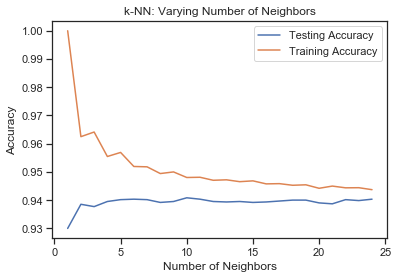

In [956]:
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [966]:
n = 10
knn = KNeighborsClassifier(n_neighbors= n)

In [958]:
# Fit the classifier to the training data
knn.fit(X_train,y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print("Accuracy: {}".format(knn.score(X_test, y_test)))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("KNN Neighbors = {}".format(n))
acc_knn = knn.score(X_test, y_test)

Accuracy: 0.9408478475188958
[[5619   72]
 [ 288  107]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      5691
           1       0.60      0.27      0.37       395

   micro avg       0.94      0.94      0.94      6086
   macro avg       0.77      0.63      0.67      6086
weighted avg       0.93      0.94      0.93      6086

KNN Neighbors = 10


In [967]:
knn.fit(X_Train,Y_Train)
knn_Y_pred = knn.predict(X_predict)
knn_Y_pred

array([1, 0, 0, ..., 0, 1, 1])

In [960]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Decision Tree'],
    'Score': [acc_knn, acc_log, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,Logistic Regression,0.944134
0,KNN,0.940848
2,Decision Tree,0.937726


In [1023]:
logreg.score(X_predict,Y_predict)

0.7457942187935682

In [788]:
numeric_data = df
label = LabelEncoder()
dicts = {}

X = [
                   'age', 'job', 'marital',
                   'education', 'default', 'housing',
                   'loan','contact',
                   'month','day_of_week','duration', 'campaign',
                   'pdays','previous',
                   'poutcome', 'emp.var.rate',
                   'cons.price.idx', 'cons.conf.idx',
                   'euribor3m', 'nr.employed'
]

fields = X
fields.append('y')

for f in fields:
    label.fit(df[f].drop_duplicates())
    dicts[f] = list(label.classes_)
    numeric_data[f] = label.transform(df[f])    

target = numeric_data['y']
numeric_data = numeric_data.drop(['y'], axis=1)     

# Looking for most valuable columns in our dataset
# k-value affect auc final score and roc curve
numeric_data_best = SelectKBest(f_classif, k=7).fit_transform(numeric_data, target)

#looking for null data
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [962]:
knn.score(X_predict,Y_predict)

0.7719118877219072

In [963]:
tree.score(X_predict,Y_predict)

0.7504414908448741

In [937]:
from sklearn.metrics import roc_auc_score


In [964]:
print(confusion_matrix(Y_predict,logreg_Y_pred))
print(classification_report(Y_predict,logreg_Y_pred))
print(roc_auc_score(Y_predict, logreg_Y_pred))

[[5877 2149]
 [ 523 2210]]
              precision    recall  f1-score   support

           0       0.92      0.73      0.81      8026
           1       0.51      0.81      0.62      2733

   micro avg       0.75      0.75      0.75     10759
   macro avg       0.71      0.77      0.72     10759
weighted avg       0.81      0.75      0.77     10759

0.7704402012522603


In [965]:
print(confusion_matrix(Y_predict,tree_Y_pred))
print(classification_report(Y_predict,tree_Y_pred))
print(roc_auc_score(Y_predict, tree_Y_pred))

[[7929   97]
 [2588  145]]
              precision    recall  f1-score   support

           0       0.75      0.99      0.86      8026
           1       0.60      0.05      0.10      2733

   micro avg       0.75      0.75      0.75     10759
   macro avg       0.68      0.52      0.48     10759
weighted avg       0.71      0.75      0.66     10759

0.5204847646174448


In [968]:
print(confusion_matrix(Y_predict,knn_Y_pred))
print(classification_report(Y_predict,knn_Y_pred))
print(roc_auc_score(Y_predict, knn_Y_pred))

[[6882 1144]
 [1310 1423]]
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      8026
           1       0.55      0.52      0.54      2733

   micro avg       0.77      0.77      0.77     10759
   macro avg       0.70      0.69      0.69     10759
weighted avg       0.77      0.77      0.77     10759

0.6890682486456157


In [16]:
# comparing best model
model_lr = LogisticRegression(penalty='l1', tol=0.01) 
model_dt = DecisionTreeClassifier(max_depth=1, criterion='entropy', random_state=0)
model_svc = svm.SVC() 
model_svc = SVC(kernel='rbf', random_state=0)
model_bnn = MLPClassifier()

ROCtrainTRN, ROCtestTRN, ROCtrainTRG, ROCtestTRG = model_selection.train_test_split(numeric_data_best, target, test_size=0.3) 

results = {}
kfold = 10

results['LogisticRegression_best_params'] = model_selection.cross_val_score(model_lr, numeric_data_best, target, cv = kfold).mean()
results['DecisionTree_best_params'] = model_selection.cross_val_score(model_dt, numeric_data_best, target, cv = kfold).mean()
results['SVC_best_params'] = model_selection.cross_val_score(model_svc, numeric_data_best, target, cv = kfold).mean()
results['NN_best_params'] = model_selection.cross_val_score(model_bnn, numeric_data_best, target, cv = kfold).mean()

results['LogisticRegression_all_params'] = model_selection.cross_val_score(model_lr, numeric_data, target, cv = kfold).mean()
results['DecisionTree_all_params'] = model_selection.cross_val_score(model_dt, numeric_data, target, cv = kfold).mean()
results['SVC_all_params'] = model_selection.cross_val_score(model_svc, numeric_data, target, cv = kfold).mean()
results['NN_all_params'] = model_selection.cross_val_score(model_bnn, numeric_data, target, cv = kfold).mean()    

/Users/kyle/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kyle/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kyle/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kyle/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kyle/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 

/Users/kyle/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/kyle/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/kyle/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/kyle/anaconda3/lib/python3.7/site-packages/sklearn/

/Users/kyle/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/kyle/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


<Figure size 432x288 with 0 Axes>

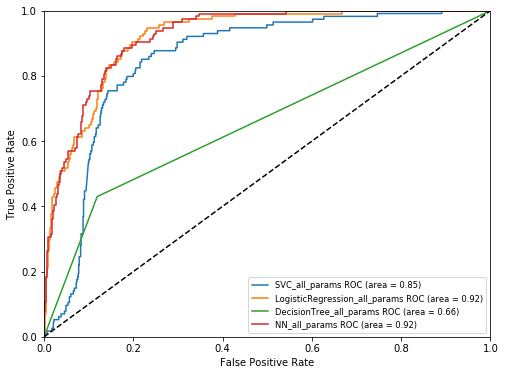

In [17]:
# ROC with all parameters
roc_train_all, roc_test_all, roc_train_all_class, roc_test_all_class = model_selection.train_test_split(numeric_data, target, test_size=0.25) 
roc_train_best, roc_test_best, roc_train_best_class, roc_test_best_class = model_selection.train_test_split(numeric_data_best, target, test_size=0.25) 

models = [
    {
        'label' : 'SVC_all_params',
        'model': model_svc,
        'roc_train': roc_train_all,
        'roc_test': roc_test_all,
        'roc_train_class': roc_train_all_class,        
        'roc_test_class': roc_test_all_class,        
    },        
    {
        'label' : 'LogisticRegression_all_params',
        'model': model_lr,
        'roc_train': roc_train_all,
        'roc_test': roc_test_all,
        'roc_train_class': roc_train_all_class,        
        'roc_test_class': roc_test_all_class,        
    },
    {
        'label' : 'DecisionTree_all_params',
        'model': model_dt,
        'roc_train': roc_train_all,
        'roc_test': roc_test_all,
        'roc_train_class': roc_train_all_class,        
        'roc_test_class': roc_test_all_class,        
    },
    {
        'label' : 'NN_all_params',
        'model': model_bnn,
        'roc_train': roc_train_all,
        'roc_test': roc_test_all,
        'roc_train_class': roc_train_all_class,        
        'roc_test_class': roc_test_all_class,        
    }
]


plt.clf()
plt.figure(figsize=(8,6))

for m in models:
    m['model'].probability = True
    probas = m['model'].fit(m['roc_train'], m['roc_train_class']).predict_proba(m['roc_test'])
    fpr, tpr, thresholds = roc_curve(m['roc_test_class'], probas[:, 1])
    roc_auc  = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], roc_auc))


plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=0, fontsize='small')
plt.show()

/Users/kyle/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/kyle/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


<Figure size 432x288 with 0 Axes>

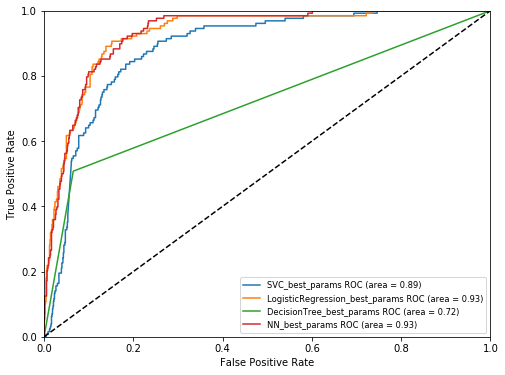

In [18]:
# ROC with best parameters
roc_train_all, roc_test_all, roc_train_all_class, roc_test_all_class = model_selection.train_test_split(numeric_data, target, test_size=0.25) 
roc_train_best, roc_test_best, roc_train_best_class, roc_test_best_class = model_selection.train_test_split(numeric_data_best, target, test_size=0.25) 

models = [
    {
        'label' : 'SVC_best_params',
        'model': model_svc,
        'roc_train': roc_train_best,
        'roc_test': roc_test_best,
        'roc_train_class': roc_train_best_class,        
        'roc_test_class': roc_test_best_class,        
    },        
    {
        'label' : 'LogisticRegression_best_params',
        'model': model_lr,
        'roc_train': roc_train_best,
        'roc_test': roc_test_best,
        'roc_train_class': roc_train_best_class,        
        'roc_test_class': roc_test_best_class,        
    },
    {
        'label' : 'DecisionTree_best_params',
        'model': model_dt,
        'roc_train': roc_train_best,
        'roc_test': roc_test_best,
        'roc_train_class': roc_train_best_class,        
        'roc_test_class': roc_test_best_class,        
    },
    {
        'label' : 'NN_best_params',
        'model': model_bnn,
        'roc_train': roc_train_best,
        'roc_test': roc_test_best,
        'roc_train_class': roc_train_best_class,        
        'roc_test_class': roc_test_best_class,        
    }
]


plt.clf()
plt.figure(figsize=(8,6))

for m in models:
    m['model'].probability = True
    probas = m['model'].fit(m['roc_train'], m['roc_train_class']).predict_proba(m['roc_test'])
    fpr, tpr, thresholds = roc_curve(m['roc_test_class'], probas[:, 1])
    roc_auc  = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], roc_auc))


plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=0, fontsize='small')
plt.show()

/Users/kyle/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/kyle/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


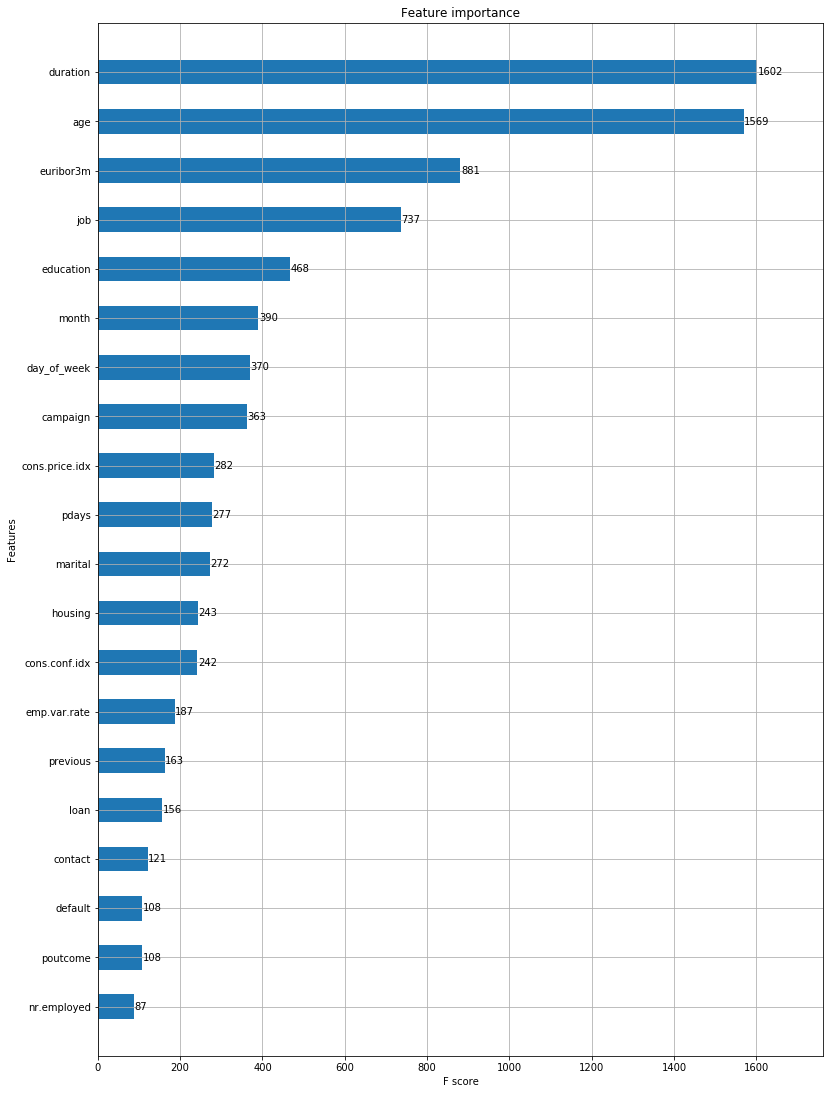

In [19]:
xgb_params = {
    'eta': 0.05,
    'max_depth': 8,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}

dtrain = xgb.DMatrix(numeric_data,target,feature_names = numeric_data.columns.values)
model = xgb.train(dict(xgb_params,silent=0),dtrain,num_boost_round=100)

fig,ax=plt.subplots(figsize = (13,19))
xgb.plot_importance(model, max_num_features=50, height=0.5, ax=ax)
plt.show()